# Laboratorio 2

## Postgrado en Análisis y Predicción de Datos

### Universidad Galileo

#### Text Mining & Image Recognition

---

**Diego Morales**  
*13001893*

---

Este laboratorio explora técnicas fundamentales en el procesamiento de imágenes utilizando Python. A continuación, se describen las actividades realizadas:

- **Binarización de Imágenes**: Se desarrolló una función que convierte una imagen a escala de grises y aplica una binarización manual, utilizando un umbral predefinido para distinguir los píxeles claros de los oscuros.

- **Operaciones entre Imágenes**: Se implementó una función que permite realizar operaciones lógicas (SUMA, RESTA, AND, OR, XOR) entre dos imágenes binarizadas, ofreciendo flexibilidad en la manipulación de las imágenes.

- **Visualización 3D de Intensidades**: Se creó una función para representar en 3D la intensidad de los píxeles en una imagen en escala de grises, permitiendo una mejor comprensión de la distribución de los valores de intensidad.

- **Transformaciones de Intensidad**: Se exploraron diferentes transformaciones de imágenes, incluyendo la transformación negativa, lineal, y logarítmica, para alterar y visualizar los cambios en la intensidad de los píxeles.

- **Aplicación de Filtros mediante Convoluciones**: Se implementó un algoritmo para aplicar filtros convolucionales a una imagen, utilizando un kernel predefinido, lo que permite resaltar características específicas como bordes y texturas.
  
- **Detección de Bordes**: Se compararon el Kernel Laplaciano y el Algoritmo de Canny, dos técnicas para la detección de bordes en imágenes, analizando sus respectivas ventajas y limitaciones en la identificación de contornos y manejo del ruido.

In [12]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

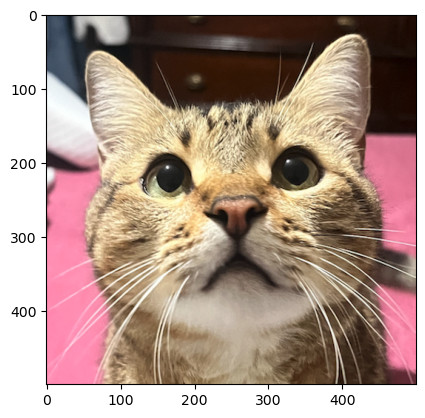

In [14]:
img1 = cv2.imread('whisky.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img1)
plt.show()

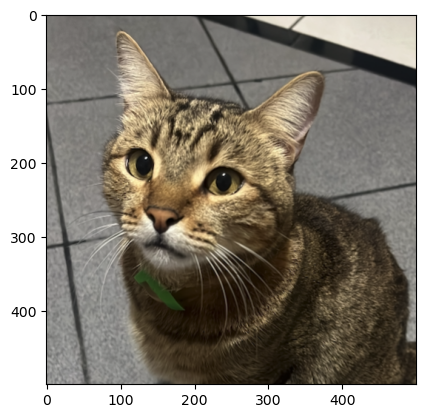

In [16]:
img2 = cv2.imread('whisky_2.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img2)
plt.show()

## Problema 1

In [19]:
def binarize(img, threshold=127):
    gray_image = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    height, width = gray_image.shape
    binary_image = np.zeros((height, width), dtype=np.uint8)
    
    for i in range(height):
        for j in range(width):
            if gray_image[i, j] > threshold:
                binary_image[i, j] = 255
            else:
                binary_image[i, j] = 0

    return binary_image

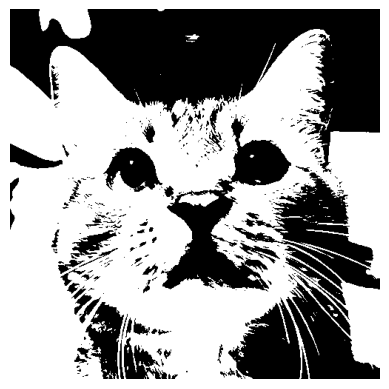

True

In [29]:
binary_image = binarize(img1)
plt.imshow(binary_image, cmap='gray')
plt.axis('off')
plt.show()
cv2.imwrite('ejercicio_1/binary_image.jpg', binary_image)

## Problema 2

In [35]:
def operator(img1, img2, option, threshold=127):
    gray_img1 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
    gray_img2 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

    binary_img1 = binarize(img1, threshold)
    binary_img2 = binarize(img2, threshold)
    
    height, width = binary_img1.shape
    output_image = np.zeros((height, width), dtype=np.uint8)
    
    for i in range(height):
        for j in range(width):
            if option == 'SUMA':
                output_image[i, j] = min(binary_img1[i, j] + binary_img2[i, j], 255)
            elif option == 'RESTA':
                output_image[i, j] = max(binary_img1[i, j] - binary_img2[i, j], 0)
            elif option == 'AND':
                output_image[i, j] = binary_img1[i, j] & binary_img2[i, j]
            elif option == 'OR':
                output_image[i, j] = binary_img1[i, j] | binary_img2[i, j]
            elif option == 'XOR':
                output_image[i, j] = binary_img1[i, j] ^ binary_img2[i, j]
            else:
                raise ValueError("Opción no válida.")

    return output_image

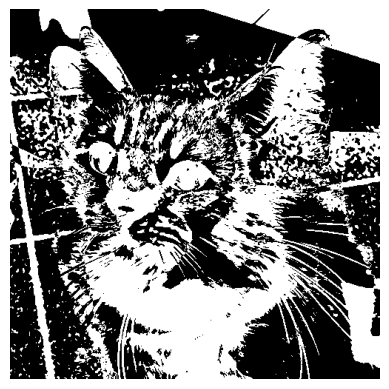

True

In [59]:
option = 'XOR'
output_image = operator(img1, img2, option)

plt.imshow(output_image, cmap='gray')
plt.axis('off')
plt.show()
cv2.imwrite(f'ejercicio_2/operator_image_{option}.jpg', output_image)

## Problema 3

In [65]:
def plot_3d(img):
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    height, width = gray_img.shape
    
    X = []
    Y = []
    Z = []

    for i in range(height):
        for j in range(width):
            X.append(j)
            Y.append(i)
            Z.append(gray_img[i, j])

    X = np.array(X)
    Y = np.array(Y)
    Z = np.array(Z)

    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_trisurf(X, Y, Z, cmap='gray', edgecolor='none')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Intensidad del color gris')
    plt.savefig('ejercicio_3/plot_3d.jpg', dpi=300)
    plt.show()

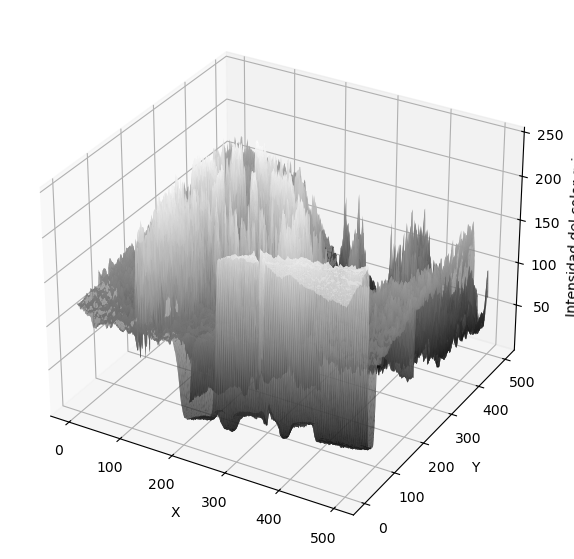

In [67]:
plot_3d(img2)

## Problema 4

In [71]:
def negative_transformation(img):
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    height, width = gray_img.shape

    neg_img = np.zeros((height, width), dtype=np.uint8)

    for i in range(height):
        for j in range(width):
            neg_img[i, j] = 255 - gray_img[i, j]

    return neg_img

True

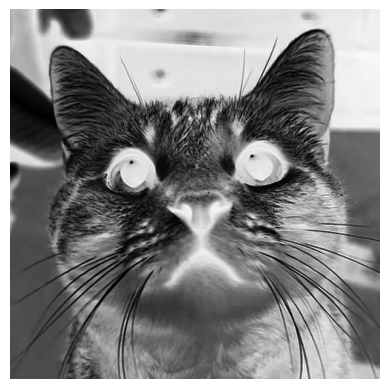

In [73]:
neg_img = negative_transformation(img1)
plt.imshow(neg_img, cmap='gray')
plt.axis('off')
cv2.imwrite('ejercicio_4/neg_img.jpg', neg_img)

In [77]:
def linear_transformation(img, a=1.0, b=0.0):
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    height, width = gray_img.shape
    
    lin_img = np.zeros((height, width), dtype=np.uint8)

    for i in range(height):
        for j in range(width):
            lin_img[i, j] = np.clip(a * gray_img[i, j] + b, 0, 255)

    return lin_img

True

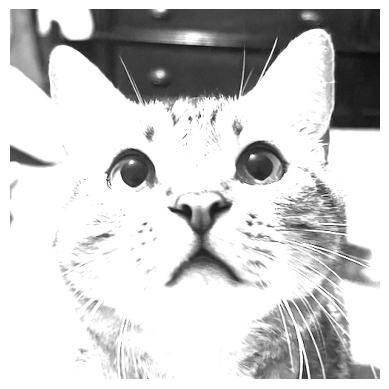

In [79]:
lin_img = linear_transformation(img1, a=2, b=10)
plt.imshow(lin_img, cmap='gray')
plt.axis('off')
cv2.imwrite('ejercicio_4/lin_img.jpg', lin_img)

In [81]:
def logarithmic_transformation(img, c=1.0):
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    height, width = gray_img.shape

    log_img = np.zeros((height, width), dtype=np.uint8)

    for i in range(height):
        for j in range(width):
            log_img[i, j] = np.clip(c * np.log1p(gray_img[i, j]), 0, 255)

    return log_img

True

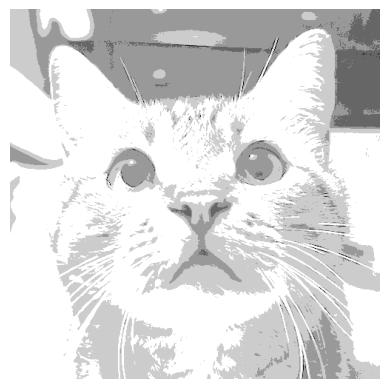

In [83]:
log_img = logarithmic_transformation(img1)
plt.imshow(log_img, cmap='gray')
plt.axis('off')
cv2.imwrite('ejercicio_4/log_img.jpg', log_img)

## Problema 5

In [87]:
def conv(img, kernel):
    height, width, channels = img.shape
    k_height, k_width = kernel.shape

    pad_height = k_height // 2
    pad_width = k_width // 2

    filtered_img = np.zeros_like(img)

    img_padded = np.pad(img,
                        ((pad_height, pad_height),
                         (pad_width, pad_width), (0, 0)),
                        mode='constant')

    for i in range(height):
        for j in range(width):
            for c in range(channels):
                region = img_padded[i:i + k_height, j:j + k_width, c]
                filtered_img[i, j, c] = np.clip(np.sum(region * kernel), 0, 255)

    return filtered_img

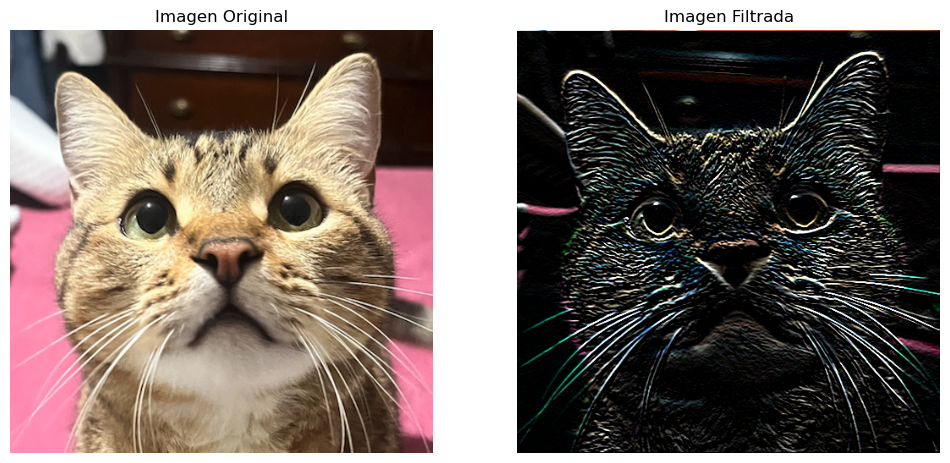

In [89]:
kernel = np.array([[-1, -2, -1],
                   [0, 0, 0],
                   [1, 2, 1]])
filtered_img  = conv(img1, kernel)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.title('Imagen Original')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(filtered_img)
plt.title('Imagen Filtrada')
plt.axis('off')
plt.savefig('ejercicio_5/filtered_img.jpg', dpi=300)
plt.show()

## Problema 6

El Kernel Laplaciano es un operador de segunda derivada utilizado para la detección de bordes en imágenes. Resalta los cambios bruscos en la intensidad de los píxeles, lo que permite identificar los bordes. Sin embargo, es sensible al ruido y no distingue la dirección de los bordes (se dice que es isotrópico), lo que puede llevar a una detección menos precisa en imágenes ruidosas.

El Algoritmo de Canny es un método avanzado y preciso para la detección de bordes, que incluye> suavizado de la imagen de ntrada con filtros gaussianos, computación de grandientes, supresión no máxima y la utilización de umbrales para detectar bordes. Permite detectar bordes de manera más robusta y con menos sensibilidad al ruido, además de identificar la dirección de los bordes sin embargo, es computacionalmente costoso.

Entre sus diferencias principales:
- Canny incluye una etapa de suavizado mientras que el Laplaciano no.
- Canny considera la direcciónde los bordes mientras que el Laplaciano es indiferente a la dirección.
- Canny es más preciso para la detección de bordes comparado con el Laplaciano.
- Canny requiere de un poder computacional más elevado que el Laplaciano.


*Referencia Bibliográfica*

`Gonzalez, R. C., Woods, R. E., & Eddins, S. L. (2003). Digital image processing using MATLAB. http://cds.cern.ch/record/1350801`